In [20]:
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import os
from tqdm import tqdm
import numpy as np
import pandas as pd

In [2]:
labels = os.listdir("../lesson_28/train/")

In [3]:
categories = {category:key for category,key in zip(labels, range(len(labels)))}

In [4]:
it = tqdm(zip(categories.keys(),categories.values()), total=len(categories.values()), desc=f'Чтение')
x_train = []
y_train = []
for key, index in it:
    it.set_description(f'Чтение {key}', refresh=True)
    for filename in os.listdir(f"train/{key}"):
        image = Image.open(f"train/{key}/{filename}")
        x_train.append(np.array(image.resize((224,224)), dtype=np.uint8))
        y_train.append(index)

Чтение two of spades: 100%|██████████| 53/53 [00:06<00:00,  7.59it/s]    


In [5]:
it = tqdm(zip(categories.keys(),categories.values()), total=len(categories.values()), desc=f'Чтение')
x_test = []
y_test = []
for key, index in it:
    it.set_description(f'Чтение {key}', refresh=True)
    for filename in os.listdir(f"test/{key}"):
        image = Image.open(f"test/{key}/{filename}")
        x_test.append(np.array(image.resize((224,224)), dtype=np.uint8))
        y_test.append(index)

Чтение two of spades: 100%|██████████| 53/53 [00:00<00:00, 159.64it/s]    


In [6]:
it = tqdm(zip(categories.keys(),categories.values()), total=len(categories.values()), desc=f'Чтение')
x_valid = []
y_valid = []
for key, index in it:
    it.set_description(f'Чтение {key}', refresh=True)
    for filename in os.listdir(f"valid/{key}"):
        image = Image.open(f"valid/{key}/{filename}")
        x_valid.append(np.array(image.resize((224,224)), dtype=np.uint8))
        y_valid.append(index)

Чтение two of spades: 100%|██████████| 53/53 [00:00<00:00, 162.55it/s]    


In [7]:
x_train = np.array(x_train, dtype=np.uint8)
y_train = np.array(y_train, dtype=np.uint8)
x_test = np.array(x_test, dtype=np.uint8)
y_test = np.array(y_test, dtype=np.uint8)
x_valid = np.array(x_valid, dtype=np.uint8)
y_valid = np.array(y_valid, dtype=np.uint8)

<BarContainer object of 53 artists>

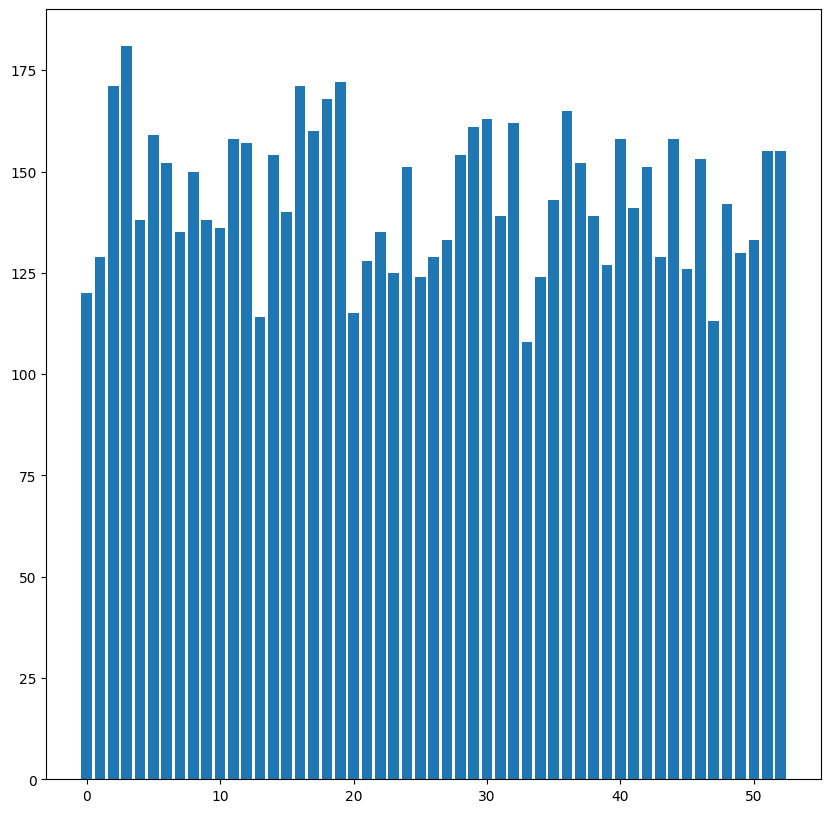

In [8]:
plt.figure(figsize=(10,10))
plt.bar(categories.values(), np.unique(y_train, return_counts=True)[1])

In [9]:
np.save('x_train', x_train)
np.save('y_train', y_train)
np.save('x_test', x_test)
np.save('y_test', y_test)
np.save('x_valid', x_valid)
np.save('y_valid', y_valid)

In [10]:
model = tf.keras.models.load_model('effnet/model')

In [11]:
model_metrics_test = model.evaluate(x_test, tf.one_hot(y_test, depth=53))

9/9 [==============================] - 9s 610ms/step - loss: 0.6048 - f1_score: 0.8571 - categorical_accuracy: 0.8566


In [12]:
model_metrics_valid = model.evaluate(x_valid, tf.one_hot(y_valid, depth=53))

9/9 [==============================] - 5s 565ms/step - loss: 0.4876 - f1_score: 0.8705 - categorical_accuracy: 0.8755


In [13]:
model_fine_tuned = tf.keras.models.load_model('effnet/model_fine_tuned')

In [14]:
model_ft_metrics_test = model_fine_tuned.evaluate(x_test, tf.one_hot(y_test, depth=53))

9/9 [==============================] - 8s 561ms/step - loss: 0.3660 - f1_score: 0.8978 - categorical_accuracy: 0.8981


In [15]:
model_ft_metrics_valid = model_fine_tuned.evaluate(x_valid, tf.one_hot(y_valid, depth=53))

9/9 [==============================] - 5s 565ms/step - loss: 0.3410 - f1_score: 0.9216 - categorical_accuracy: 0.9245


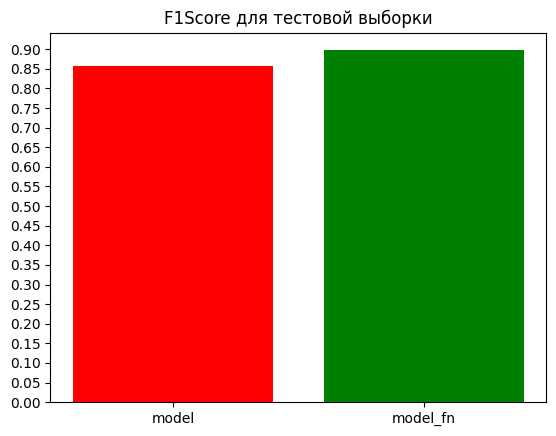

In [16]:
plt.yticks(np.arange(0,1,0.05))
plt.bar(['model','model_fn'], height=[model_metrics_test[1], model_ft_metrics_test[1]], color=['red', 'green'])
plt.title('F1Score для тестовой выборки')
plt.show()

In [17]:
print(f'Прирост f1score на тестовой выборке на: {round((abs(model_metrics_test[1]-model_ft_metrics_test[1]))/model_metrics_test[1], ndigits=4)*100} процентов')

Прирост f1score на тестовой выборке на: 4.75 процентов


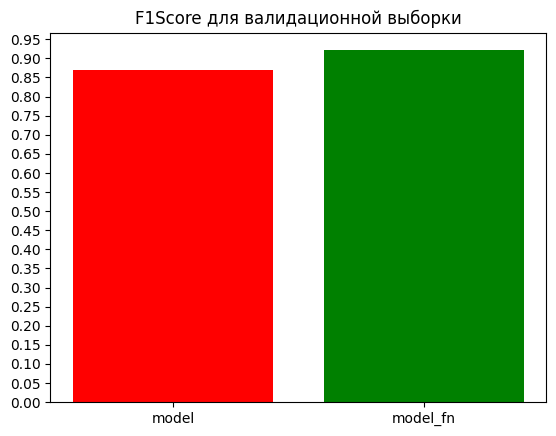

In [18]:
plt.yticks(np.arange(0,1,0.05))
plt.bar(["model", 'model_fn'], height=[model_metrics_valid[1], model_ft_metrics_valid[1]], color=['red', 'green'])
plt.title('F1Score для валидационной выборки')
plt.show()

In [19]:
print(f'Прирост f1score на валидационной выборке на: {round((abs(model_metrics_valid[1]-model_ft_metrics_valid[1]))/model_metrics_valid[1], ndigits=4)*100} процентов')

Прирост f1score на валидационной выборке на: 5.88 процентов


In [21]:
stats_regulizer: pd.DataFrame = pd.read_csv('./mobilenet/logs')
stats_no_regulizer: pd.DataFrame = pd.read_csv('./mobilenet/logs_no_regulizer')
stats_gen: pd.DataFrame = pd.read_csv('./mobilenet/logs_generator')

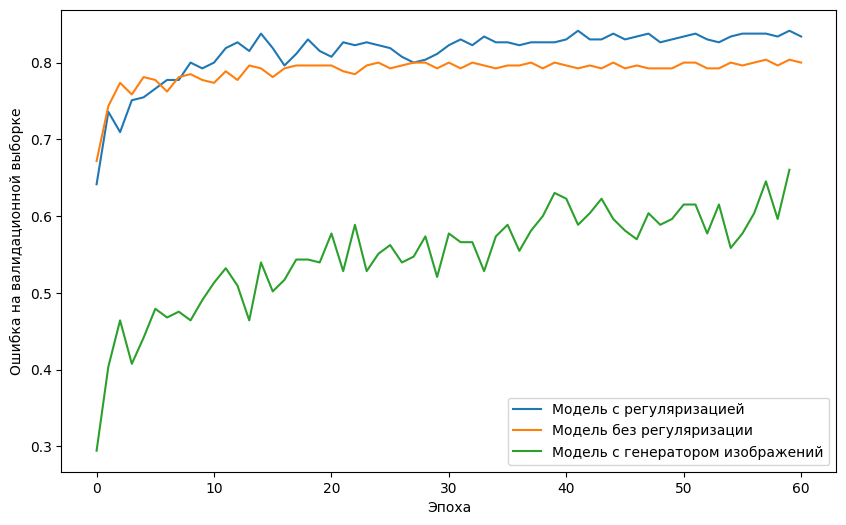

In [43]:
plt.figure(figsize=(10,6))
plt.plot(stats_regulizer['epoch'], stats_regulizer['val_categorical_accuracy'], label='Модель с регуляризацией')
plt.plot(stats_no_regulizer['epoch'], stats_no_regulizer['val_categorical_accuracy'], label='Модель без регуляризации')
plt.plot(stats_gen['epoch'][:60], stats_gen['val_categorical_accuracy'][:60], label='Модель с генератором изображений')
plt.legend()
plt.xlabel('Эпоха')
plt.ylabel('Ошибка на валидационной выборке')
plt.show()

Датасет: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification

Скриншот с fine-tuning обученной предобученной модели: https://prnt.sc/jlfka5pJDjm_

Скриншот обучения с генератором картинок: https://prnt.sc/yPxF-jsO7OE4

Скриншот обучения без генератора: https://prnt.sc/Cch_wYPZGVpK

Скриншот обучения без генератора и с регуляризацией на последнем слое: https://prnt.sc/qJUf0BUb4iK1

Изображения игральных карт - 53 класса.
Из моделей я взял EfficientNetV2B1 и MobileNetV3Small. Генератор изображений использовался лишь во втором случае, т.к. там не считалась метрика F1Score(она ругалась что метки класа pred и true имеют различный shape, но фикса я не нашел). По поводу генератора изображений хотелось бы отметить, что он не дал никакого прироста, даже наоборот сделал хуже в плане метрик и в плане скорости обучения(видимо он не оптимизирован, т.к. эпоха обучалась по 60 секунд, а без него - 4. Почему я думаю, что он не оптимизирован, по той причине, что во время обучения нагрузка на видеокарту мою была всего 6 процентов, а на оф. сайте tensorflow написано DEPRECATED. В общем, возможно я хреново подобрал параметры у генератора, но честно говоря я разочарован.) Из двух моделей лучше всего себя показала EfficientNetV2B1. Она имеет точность выше на процентов 6-7%, но к ее обучению я подходил так сказать более ответственно в том плане, что после обучения я размораживал все слои и повторно обучал. Тут я столкнулся с потерей оптимизации в полный нуль и нехваткой памяти, но в сравнении точности прирост ~5%. При обучении второй модели я использовал новые для себя коллбеки для изменения learning_rate, логирования и остановке обучения при значениях = NaN. К сожалению вторую модель сохранить не удалось, т.к. я задал довольно высокий порог, но по логам и скриншотам можно посмотреть статы обучения и на тестовой выборке(я думаю большего и не надо). Построил график для сравнения изменения точности с каждой эпохой и лучший результат имеет конфигурация с регуляризацией на последнем слое(Dense). Прирост около 3-4%. F1Score я уже не подкручивал, когда обучение было без генератора, т.к. судя по первой модели различия между F1 и точностью были мизерными, т.к. я создаю словарь весов для меток класса. 

P.S. Да, можно было бы сделать базовый класс и от него наследоваться, чтобы не писать по 10 раз один и тот же код, но вот так вот.